In [1]:
# Add project path to the PYTHONPATH

import os
import sys
import numpy as np
from pathlib import Path

sys.path.append(Path(os.path.join(os.path.abspath(''), '../')).resolve().as_posix())

In [2]:
import pickle

In [3]:
from nlp.dataset import Dataset

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rmohashi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
dataset = Dataset('../datasets/test/1200543968942968832-1200484742493327360_China.csv')
dataset.load()
dataset.preprocess_texts(stemming=True)
data = dataset.dataframe.copy()

Time to clean up: 2.35 sec


In [5]:
import seaborn as sns

In [6]:
import pandas as pd

In [7]:
import pickle
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

/home/rmohashi/miniconda3/envs/emodata/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rmohashi/miniconda3/envs/emodata/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rmohashi/miniconda3/envs/emodata/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rmohashi/miniconda3/envs/emo

In [8]:
from emotion_recognition.models.lstm_model import lstm_model
from sentiment_analysis.models.cnn_model import cnn_model

In [9]:
tokenizer_path = Path('/home/rmohashi/hd/emotion/tokenizer.pickle').resolve()

In [10]:
with tokenizer_path.open('rb') as file:
    tokenizer = pickle.load(file)

In [11]:
sequences = [text.split() for text in data.cleaned]
list_tokenized = tokenizer.texts_to_sequences(sequences)

In [12]:
input_dim = tokenizer.num_words
embedding_dim = 100
input_length = 30

In [13]:
x_test = pad_sequences(list_tokenized, maxlen=input_length)

In [14]:
model_weights_path = Path('/home/rmohashi/hd/tweet-emotion-recognition/models/sentiment_analysis/checkpoints/CNN_100_30_ne/cnn_100_30_03-0.8084.h5').resolve()

In [15]:
model = cnn_model(input_length, input_dim, None, embedding_dim=embedding_dim)
model.load_weights(model_weights_path.as_posix())
y_pred = model.predict_classes(x_test)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
y_pred = pd.DataFrame(y_pred, columns=['results'])

In [17]:
print(y_pred.results.mean())
y_pred['results'] = y_pred.results.apply(lambda x: 'negative' if x == 0 else 'positive')

0.34500616522811345


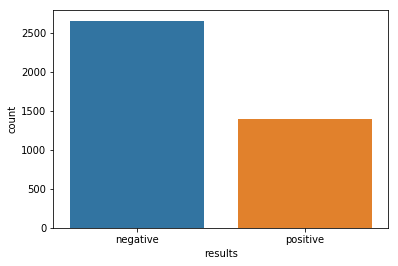

In [18]:
sns.countplot(x='results', data=y_pred)

In [19]:
encoder_path = Path('/home/rmohashi/hd/tweet-emotion-recognition/models/emotion_recognition/encoder.pickle').resolve()
with encoder_path.open('rb') as file:
    encoder = pickle.load(file)

In [20]:
model_weights_path = Path('/home/rmohashi/hd/tweet-emotion-recognition/models/emotion_recognition/checkpoints/lstm_100_30_ne/lstm_100_30_01-0.5095.h5').resolve()

In [21]:
model = lstm_model(input_length, input_dim, 4, None, embedding_dim=embedding_dim)
model.load_weights(model_weights_path.as_posix())
y_pred = model.predict_classes(x_test)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [23]:
y_pred = pd.get_dummies(y_pred)
y_pred.columns = encoder.classes_
y_pred

,anger,fear,joy,sadness
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
5,1,0,0,0
6,1,0,0,0
7,0,0,1,0
8,0,1,0,0
9,0,0,1,0


In [22]:
y_pred = pd.DataFrame(y_pred, columns=['results'])

In [23]:
def map_classes(value):
    if value == 0:
        return 'anger'
    elif value == 1:
        return 'fear'
    elif value == 2:
        return 'joy'
    else:
        return 'sadness'
y_pred['results'] = y_pred.results.apply(map_classes)

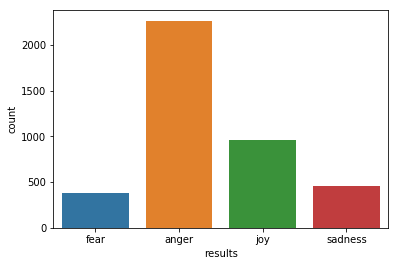

In [24]:
sns.countplot(x='results', data=y_pred)

In [25]:
encoder.classes_

array(['anger', 'fear', 'joy', 'sadness'], dtype='<U7')

In [51]:
data[y_pred.results == 'fear'].text.iloc[2]

'@Reuters Nothing Australia does will make any difference to climate change given China is 40% world emissions and increasing. China growth is a disaster for world climate.'